In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
import cv2
from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

In [3]:
class_ratio = {}

for folder in os.listdir("../Dataset/food-101/images"):
    class_ratio[folder] = len(os.listdir("../Dataset/food-101/images/"+folder))

In [4]:
list(class_ratio.keys())

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

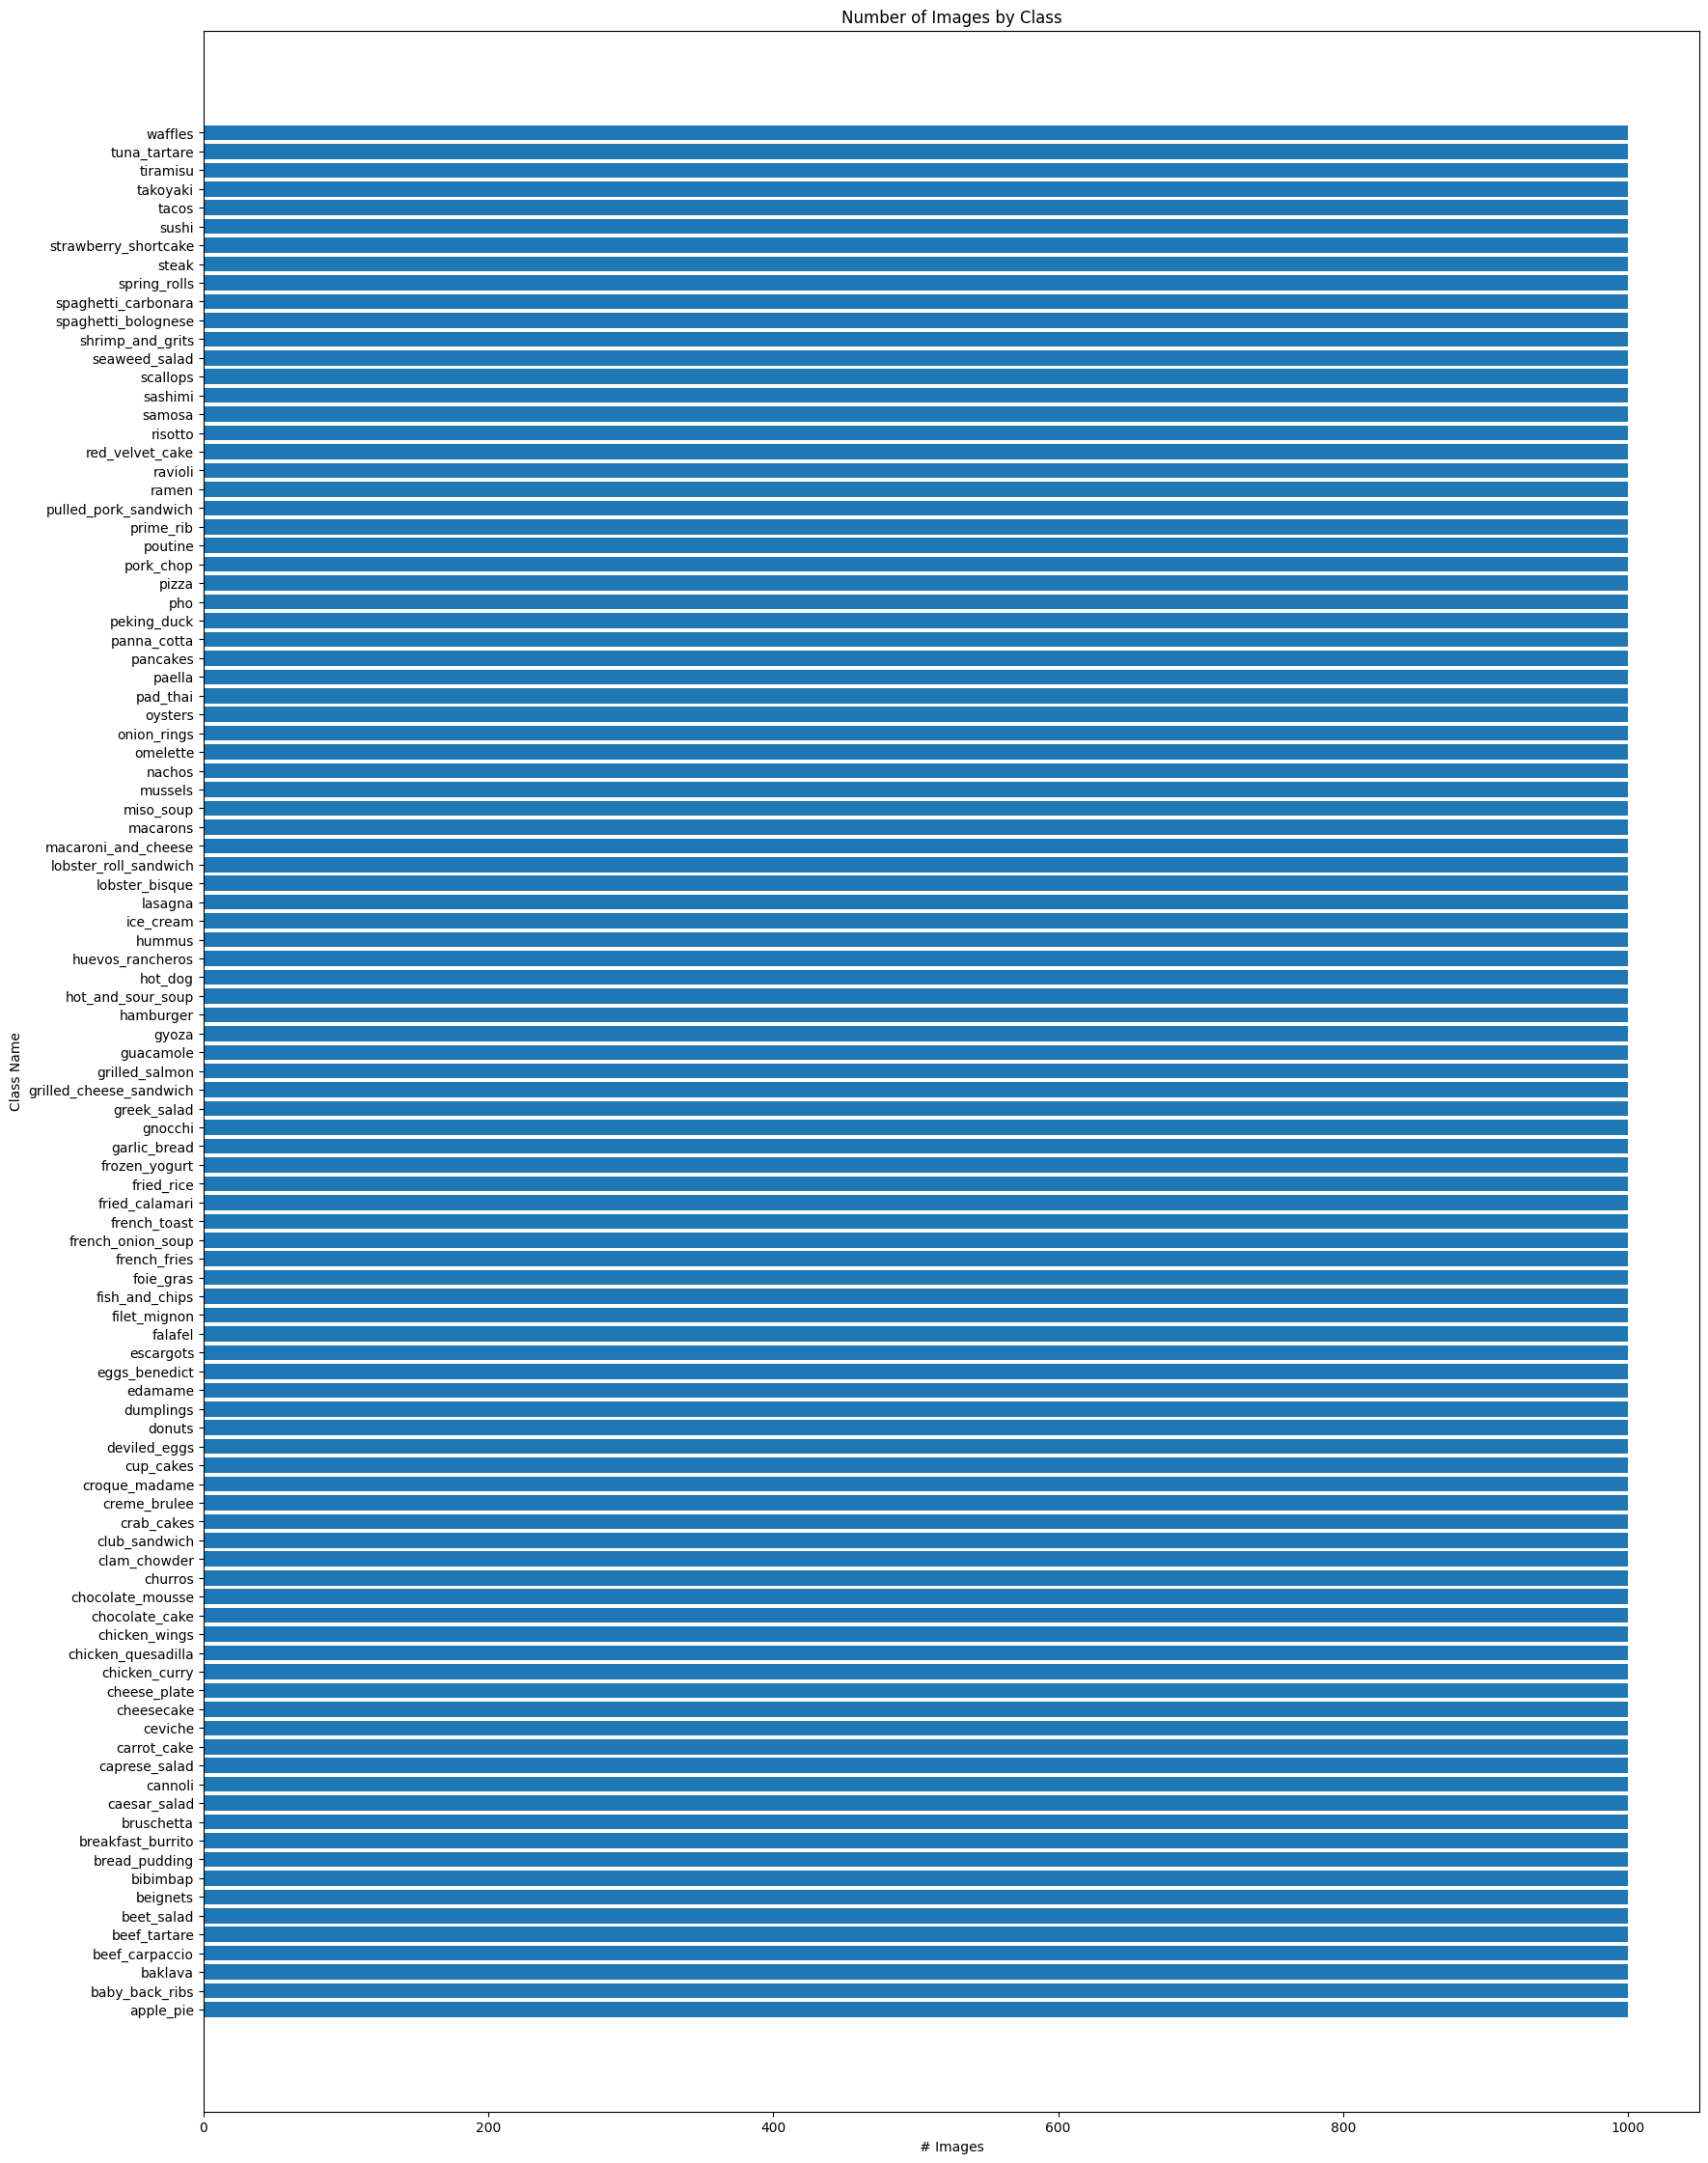

In [5]:
plt.figure(figsize=(20,28))
plt.barh(list(class_ratio.keys()), class_ratio.values());
plt.title("Number of Images by Class");
plt.ylabel('Class Name');
plt.xlabel('# Images');

In [6]:
class_dims = {}

for folder in list(class_ratio.keys()):
    path = "../Dataset/food-101/images/"+folder

    dim_arr = []

    for image in os.listdir(path):
        im = cv2.imread(path +'/' + image)
        arr = np.array(im)
        
        h,w,d = arr.shape

        dim_arr.append((h,w))

    class_dims[folder] = dim_arr
    print(folder)
    

        


apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito
bruschetta
caesar_salad
cannoli
caprese_salad
carrot_cake
ceviche
cheesecake
cheese_plate
chicken_curry
chicken_quesadilla
chicken_wings
chocolate_cake
chocolate_mousse
churros
clam_chowder
club_sandwich
crab_cakes
creme_brulee
croque_madame
cup_cakes
deviled_eggs
donuts
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
fish_and_chips
foie_gras
french_fries
french_onion_soup
french_toast
fried_calamari
fried_rice
frozen_yogurt
garlic_bread
gnocchi
greek_salad
grilled_cheese_sandwich
grilled_salmon
guacamole
gyoza
hamburger
hot_and_sour_soup
hot_dog
huevos_rancheros
hummus
ice_cream
lasagna
lobster_bisque
lobster_roll_sandwich
macaroni_and_cheese
macarons
miso_soup
mussels
nachos
omelette
onion_rings
oysters
pad_thai
paella
pancakes
panna_cotta
peking_duck
pho
pizza
pork_chop
poutine
prime_rib
pulled_pork_sandwich
ramen
ravioli
red_velvet_cake
risotto
sa

In [7]:
class_dims_0 = class_dims

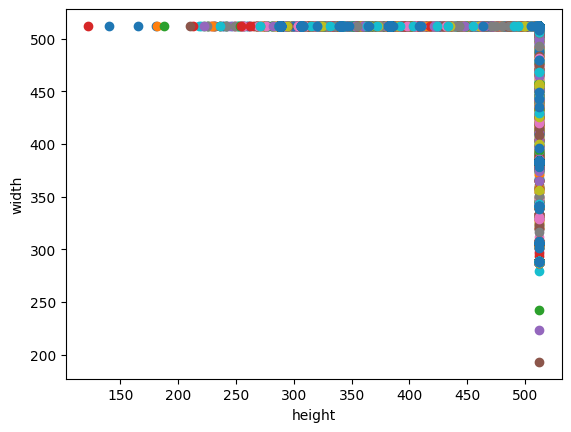

In [8]:
for classes in class_dims.keys():
    a = tuple(class_dims[classes])
    height, width = zip(*a)

    plt.scatter(height,width)
    plt.xlabel("height")
    plt.ylabel("width")


Creating data frame

In [9]:
rows = []

for folder in list(class_ratio.keys()):
    path = "../Dataset/food-101/images/"+folder

    for image in os.listdir(path):
        im_path = path +'/' + image
        rows.append(im_path)

    # rows.append(full_path)

        

In [10]:
df = pd.DataFrame(rows,columns=["Path"])

In [11]:
df

,Path
0,../Dataset/food-101/images/apple_pie/1005649.jpg
1,../Dataset/food-101/images/apple_pie/1011328.jpg
2,../Dataset/food-101/images/apple_pie/101251.jpg
3,../Dataset/food-101/images/apple_pie/1014775.jpg
4,../Dataset/food-101/images/apple_pie/1026328.jpg
...,...
100995,../Dataset/food-101/images/waffles/981485.jpg
100996,../Dataset/food-101/images/waffles/98238.jpg
100997,../Dataset/food-101/images/waffles/982668.jpg
100998,../Dataset/food-101/images/waffles/995085.jpg


In [12]:
class_label = []
j = 0

for j in range(0,101):
    for i in range(0,1000):
        class_label.append(list(class_ratio.keys())[j])


In [13]:
y_label = pd.DataFrame(class_label,columns=["Food"])

df = pd.concat([df,y_label],axis=1)

In [14]:
df

,Path,Food
0,../Dataset/food-101/images/apple_pie/1005649.jpg,apple_pie
1,../Dataset/food-101/images/apple_pie/1011328.jpg,apple_pie
2,../Dataset/food-101/images/apple_pie/101251.jpg,apple_pie
3,../Dataset/food-101/images/apple_pie/1014775.jpg,apple_pie
4,../Dataset/food-101/images/apple_pie/1026328.jpg,apple_pie
...,...,...
100995,../Dataset/food-101/images/waffles/981485.jpg,waffles
100996,../Dataset/food-101/images/waffles/98238.jpg,waffles
100997,../Dataset/food-101/images/waffles/982668.jpg,waffles
100998,../Dataset/food-101/images/waffles/995085.jpg,waffles


In [15]:
df.isna().sum()

Path    0
Food    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Path    101000 non-null  object
 1   Food    101000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [17]:
df.dtypes

Path    object
Food    object
dtype: object

In [18]:
all_food_df = df

In [19]:
df = all_food_df

In [20]:
FOOD = "samosa"

df_FOOD = df[df["Food"] == FOOD]

df_RANDOM = df.sample(len(df_FOOD))

df_RANDOM.loc[df_RANDOM["Food"] != "Samosa", "Food"] = "Other"

df_selected = pd.concat([df_FOOD,df_RANDOM],axis=0)




In [21]:
df_selected.reset_index(drop=True)

,Path,Food
0,../Dataset/food-101/images/samosa/1008131.jpg,samosa
1,../Dataset/food-101/images/samosa/1009326.jpg,samosa
2,../Dataset/food-101/images/samosa/1011601.jpg,samosa
3,../Dataset/food-101/images/samosa/101365.jpg,samosa
4,../Dataset/food-101/images/samosa/1015943.jpg,samosa
...,...,...
1995,../Dataset/food-101/images/club_sandwich/11780...,Other
1996,../Dataset/food-101/images/pho/2186238.jpg,Other
1997,../Dataset/food-101/images/baklava/1614191.jpg,Other
1998,../Dataset/food-101/images/ceviche/3808464.jpg,Other


In [22]:
features = []
IMG_SIZE = (128,128)
MAX_SIDE_LEN = 128

for image in df_selected["Path"]:
    img = cv2.imread(image)
    img = cv2.resize(img,IMG_SIZE)

    features.append(img)

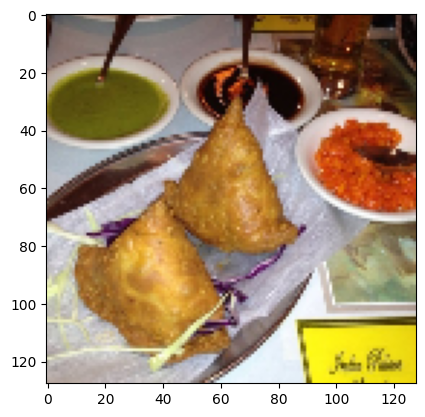

In [69]:
rgb = cv2.cvtColor(features[:1][0], cv2.COLOR_BGR2RGB)
plt.imshow(rgb)


In [23]:
x = np.array(features)
x = x / 255.0

y = df_selected["Food"]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [25]:
x_test[:1]

array([[[[0.04705882, 0.04705882, 0.08627451],
         [0.05490196, 0.05490196, 0.09411765],
         [0.04705882, 0.05098039, 0.09019608],
         ...,
         [0.68627451, 0.68627451, 0.74509804],
         [0.65490196, 0.64313725, 0.69803922],
         [0.56862745, 0.55686275, 0.60392157]],

        [[0.0745098 , 0.05490196, 0.09803922],
         [0.06666667, 0.05490196, 0.09803922],
         [0.05490196, 0.05098039, 0.09019608],
         ...,
         [0.69803922, 0.70196078, 0.75686275],
         [0.70588235, 0.71372549, 0.76862745],
         [0.71764706, 0.71764706, 0.76862745]],

        [[0.07058824, 0.05098039, 0.09411765],
         [0.07058824, 0.05490196, 0.09803922],
         [0.06666667, 0.05882353, 0.10196078],
         ...,
         [0.69411765, 0.71372549, 0.76470588],
         [0.70196078, 0.71764706, 0.77254902],
         [0.71372549, 0.71372549, 0.77254902]],

        ...,

        [[0.6627451 , 0.64705882, 0.61960784],
         [0.66666667, 0.64313725, 0.61960784]

In [26]:
# y_train = tf.keras.utils.to_categorical(y_train)
# y_val = tf.keras.utils.to_categorical(y_val)
# y_test = tf.keras.utils.to_categorical(y_test)
# # le = preprocessing.LabelEncoder()

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

enc_cols = enc.fit_transform(y_train.to_numpy().reshape(-1,1))

enc_cols=enc_cols.todense()
print(enc_cols.shape)

# We add the actual features name at the start of the one hot encoded feature name,to keep the features grouped together
y_train = pd.DataFrame(enc_cols, columns=enc.get_feature_names_out())


enc_cols = enc.transform(y_test.to_numpy().reshape(-1,1))

enc_cols=enc_cols.todense()
print(enc_cols.shape)

# We add the actual features name at the start of the one hot encoded feature name,to keep the features grouped together
y_test = pd.DataFrame(enc_cols, columns=enc.get_feature_names_out())

enc_cols = enc.transform(y_val.to_numpy().reshape(-1,1))

enc_cols=enc_cols.todense()
print(enc_cols.shape)

# We add the actual features name at the start of the one hot encoded feature name,to keep the features grouped together
y_val = pd.DataFrame(enc_cols, columns=enc.get_feature_names_out())




(1200, 2)
(400, 2)
(400, 2)


In [122]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])


#add model layers
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(MAX_SIDE_LEN, MAX_SIDE_LEN, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

model.add(Dense(2, activation="sigmoid"))


#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [124]:
model.build((None,128,128,3))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 128, 128, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 128)     

In [125]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val),
                    callbacks = [EarlyStopping(monitor='val_loss', patience=2),
                                 ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)])


Epoch 1/50
38/38 [==============================] - 38s 925ms/step - loss: 0.7073 - accuracy: 0.5567 - val_loss: 0.7208 - val_accuracy: 0.4700
Epoch 2/50
38/38 [==============================] - 33s 860ms/step - loss: 0.6772 - accuracy: 0.6033 - val_loss: 0.6324 - val_accuracy: 0.6475
Epoch 3/50
38/38 [==============================] - 31s 819ms/step - loss: 0.6481 - accuracy: 0.6300 - val_loss: 0.6596 - val_accuracy: 0.6200
Epoch 4/50
38/38 [==============================] - 27s 700ms/step - loss: 0.6384 - accuracy: 0.6600 - val_loss: 0.6285 - val_accuracy: 0.6550
Epoch 5/50
38/38 [==============================] - 36s 932ms/step - loss: 0.6320 - accuracy: 0.6417 - val_loss: 0.6803 - val_accuracy: 0.6000
Epoch 6/50
38/38 [==============================] - 36s 945ms/step - loss: 0.6030 - accuracy: 0.6783 - val_loss: 0.6098 - val_accuracy: 0.7075
Epoch 7/50
38/38 [==============================] - 35s 918ms/step - loss: 0.5802 - accuracy: 0.6967 - val_loss: 0.6010 - val_accuracy: 0.6925

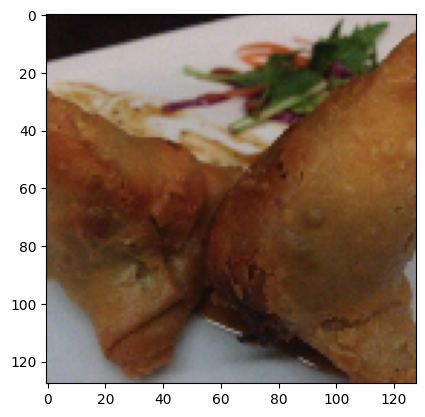

In [97]:
a = (x_test[:1]*255.0).astype(np.int32)[0]
b,g,r = cv2.split(a)
a[:,:,0] = r
a[:,:,1] = g
a[:,:,2] = b

plt.imshow(a)

In [100]:
model.predict(x_test[:5])

1/1 [==============================] - 0s 361ms/step


array([[0.2102481 , 0.79328525],
       [0.23960668, 0.7565751 ],
       [0.39888313, 0.60225564],
       [0.5036681 , 0.47929183],
       [0.6006221 , 0.4162104 ]], dtype=float32)

In [102]:
y_test[:5]

,x0_Other,x0_samosa
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
